# Github: Usuario-proyecto
## Datos
Descripción de los datos

En esta ocasión trataremos con un dataset de networkrepository que involucra una red de interacción de 86 personas en Malawi
Nodos: Personas
Enlaces: Contacto entre estas personas

Origen o método de obtención de los datos: https://networkrepository.com/ia-contacts-hypertext2009.php

In [62]:
# Importamos las librerías que usarremos a lo largo del trabajo
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import poisson

In [16]:
# Importamos los datos
ruta = "C:/Users/pepe2/Documents/QuackRepository/Quack/Ciencia_de_Redes/ia-contacts_hypertext2009.edges"
data = pd.read_csv(ruta,
                    # nrows = 10,
                    sep = ",",
                    header = None,
                    usecols=[0,1]
                    )

G = nx.from_pandas_edgelist(data, source = 0, target = 1)


In [17]:
data

,0,1
0,42,37
1,42,37
2,42,37
3,42,37
4,42,37
...,...,...
20813,32,38
20814,38,42
20815,32,38
20816,82,49


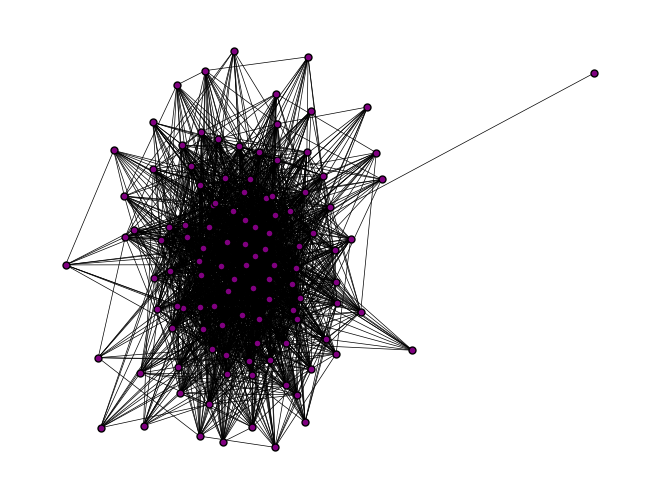

In [18]:
nx.draw(G, with_labels=False, node_size=25,node_color = 'purple',edgecolors='black',width=0.5)

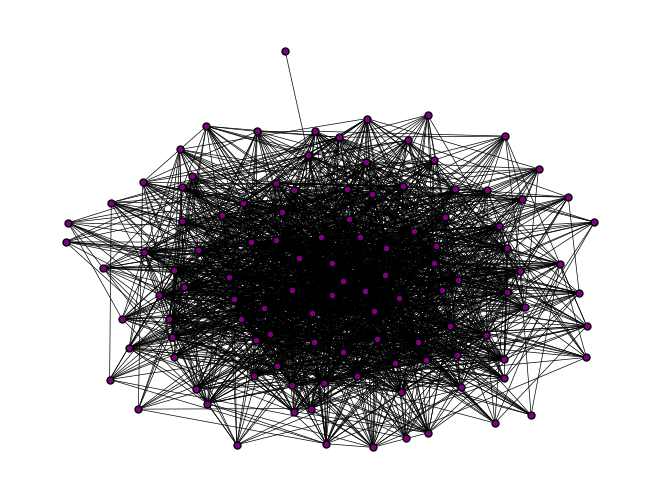

In [19]:
nx.draw_kamada_kawai(G, with_labels=False, node_size=25,node_color = 'purple',edgecolors='black',width=0.5)

## Propiedades de la red
### Propiedades generales de la red

In [20]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de la red:')
print('- El número de nodos es:', N)
print('- El número de enlaces es:', L)
print('- El grado promedio es:', k)

print('El coeficiente de clustering promedio de la red es:\n', C)

Propiedades generales de la red:
- El número de nodos es: 113
- El número de enlaces es: 2196
- El grado promedio es: 38.86725663716814
El coeficiente de clustering promedio de la red es:
 0.5347555956050043


In [21]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)
Degree = np.array([grado_dict[i] for i in G])
print("El grado máximo es: ", np.max(Degree))
print("El grado mínimo es: ", np.min(Degree))
print("La mediana del grado es: ", np.median(Degree))
print("La desviación estándar del grado es: ", np.std(Degree))

El grado máximo es:  98
El grado mínimo es:  1
La mediana del grado es:  37.0
La desviación estándar del grado es:  18.3503294681323


### Gráfica de medidas de centralidad
Ver última gráfica de https://curso-redes-f-ciencias-unam.github.io/ciencia-de-redes/medidas_y_metricas/practica_02/sesion_practica_02_notebook.html


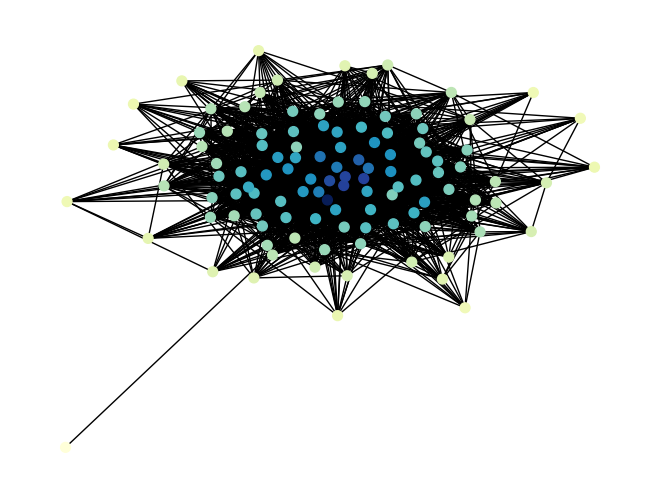

In [22]:
# CENTRALIDAD DE GRADO
degree_centrality_dict = nx.degree_centrality(G)

lis1 = [degree_centrality_dict[i] for i in G]
A = np.array([degree_centrality_dict[i] for i in G])

nx.draw(G,
        node_size = 50,
        node_color = A,
        cmap = 'YlGnBu')

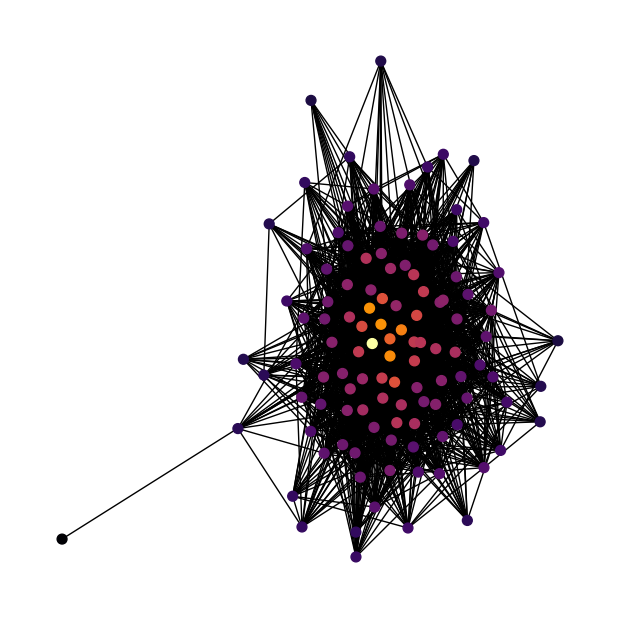

In [23]:
# CENTRALIDAD DE CERCANÍA
close_centrality_dict = nx.closeness_centrality(G)
B = np.array([close_centrality_dict[i] for i in G])
plt.figure(figsize = [6,6])

nx.draw(G,
        node_size = 50,
        node_color = B,
        cmap = 'inferno')

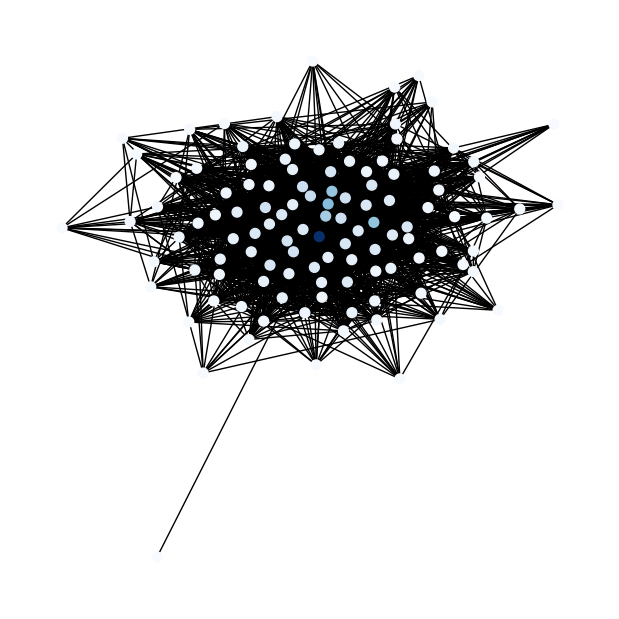

In [25]:
# CENTRALIDAD DE INTERMEDIACIÓN
between_centrality_dict = nx.betweenness_centrality(G)
C = np.array([between_centrality_dict[i] for i in G])
plt.figure(figsize = [6,6])

nx.draw(G,
        node_size = 50,
        node_color = C,
        cmap = 'Blues')

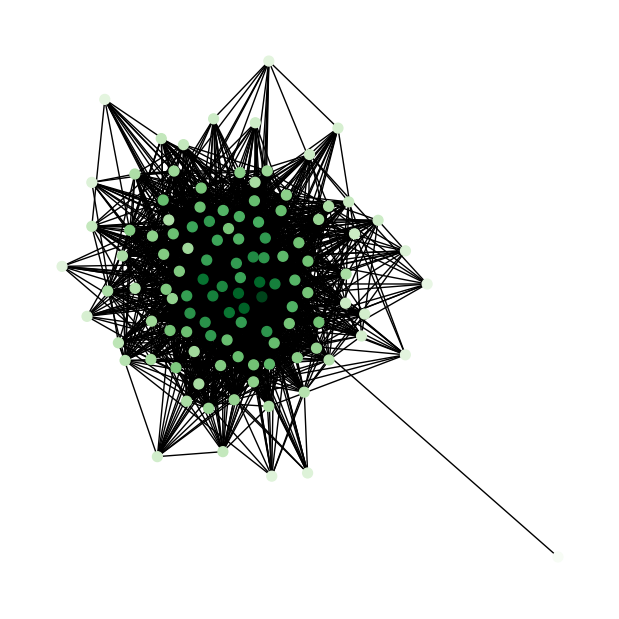

In [26]:
# CENTRALIDAD DE VECTOR PROPIO
eigen_centrality_dict = nx.eigenvector_centrality(G)
D = np.array([eigen_centrality_dict[i] for i in G])
plt.figure(figsize = [6,6])

nx.draw(G,
        node_size = 50,
        node_color = D,
        cmap = 'Greens')

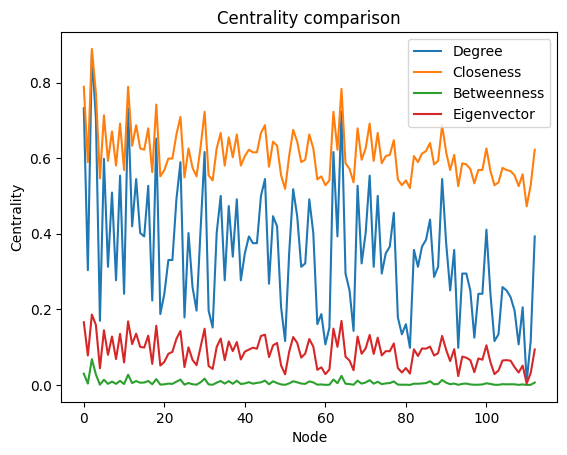

In [31]:
# GRAFICO DE COMPARACIÓN DE CENTRALIDADES
plt.title('Centrality comparison')
plt.plot(A, label = 'Degree')
plt.plot(B, label = 'Closeness')
plt.plot(C, label = 'Betweenness')
plt.plot(D, label = 'Eigenvector')
plt.xlabel('Node')
plt.ylabel('Centrality')

plt.legend()
plt.show()

### Visualización de un subconjunto de la red
Subconjunto de la red (de 500 a mil nodos) en la que dos propiedades de los nodos (grado, clustering o centralidades) se codifican con el color y el tamaño de los nodos... Explicar de qué variables se trata

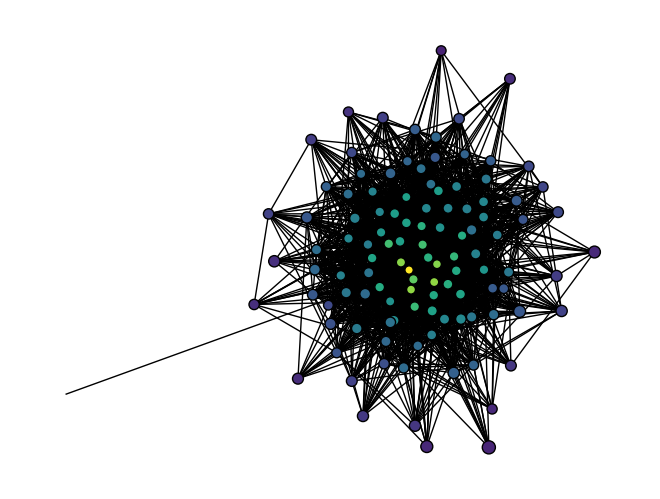

In [55]:
# Ahora tomamos un subcojunto de la red de 1000 nodos
G2 = nx.from_pandas_edgelist(data, source = 0, target = 1)
G2 = nx.subgraph(G2, np.random.choice(G2.nodes, 1000))

# GRADO
# Codificación de colores usando el grado de los nodos
A = np.array([nx.degree(G2)[i] for i in G2])

# TAMAÑO
# Codificación de tamaños usando el clustering de los nodos
clustering_dict = nx.clustering(G2)
B = np.array([clustering_dict[i] for i in G2])

nx.draw(G2,
        node_size = B*100,
        node_color = A,
        cmap = 'viridis',
        edgecolors = 'black',)


### Distribución de grado
Elegir convenientemente las escalas de los nodos

In [58]:
grad_clus_df = pd.DataFrame([grado_dict, clustering_dict]).T
grad_clus_df.columns = ['Degree', 'Clustering']
K = np.max(Degree)

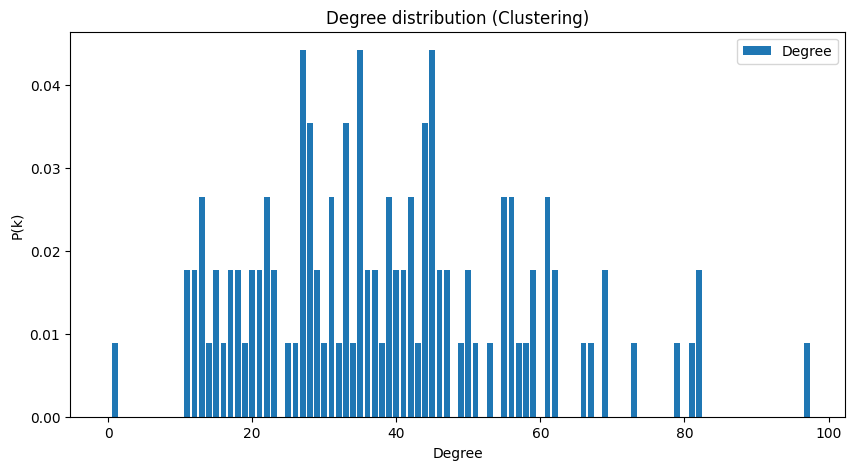

In [59]:
y,x = np.histogram(grad_clus_df.Degree.values, bins = range(K+1), density= True)
plt.figure(figsize = [10, 5])
plt.bar(x[:-1], y, label = 'Degree')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.title('Degree distribution (Clustering)')
plt.legend()
plt.show()

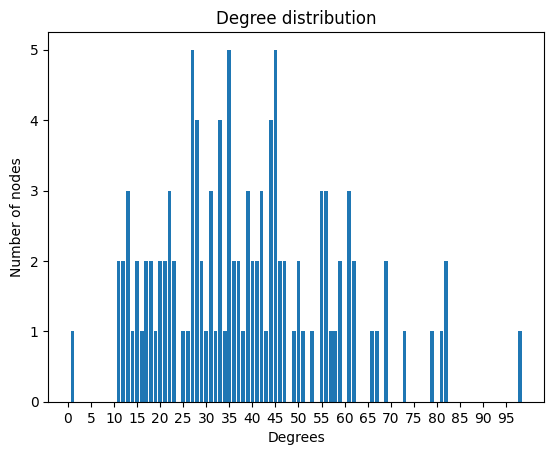

In [60]:
dist = {nx.degree(G)[nodo]:0 for nodo in G}
for nodo in G:
    dist[nx.degree(G)[nodo]] += 1

X = dist.keys()
Y = dist.values()

plt.bar(X,Y)
plt.xlabel('Degrees')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')
plt.xticks(ticks = range(0,max(X)+1,5),labels = range(0,max(X)+1,5))
plt.show()

### Interpretación
**Describe brevemente qué se puede concluir de las propiedades de la red: es "rala" o escasa (sparse), tiene propiedad de mundo pequeño, predominan los nodos con grado bajo/alto, tiene un clustering alto (como suele ocurrir en las redes sociales y naturales), etc.**

Se puede notar muchas cosas en la red previamente descrita con todo lo anterior. De inicio podemos notar que se tiene una distribución de grado bastante variada, donde todos los nodos estan bastante muy conectados entre sí. En este caso, como se trata de una red de contacto entre personas, podemos afirmar que muchos entre sí se conocen mutuamente.
Tiene mucho sentido puesto que sólo estamos hablando de 84 personas en un pequeño pueblo de Malawi.

El grado de Clustering es bastante alto con 0.53 donde efectivamente se demuestra que la red social sí tiene coeficiente de clustering alto.

## Comparación con modelos
### Modelo de red aleatoria G(N,p)
Ver https://curso-redes-f-ciencias-unam.github.io/ciencia-de-redes/redes_complejas_y_sus_propiedades/practica_04/sesion_practica_04_notebook.html

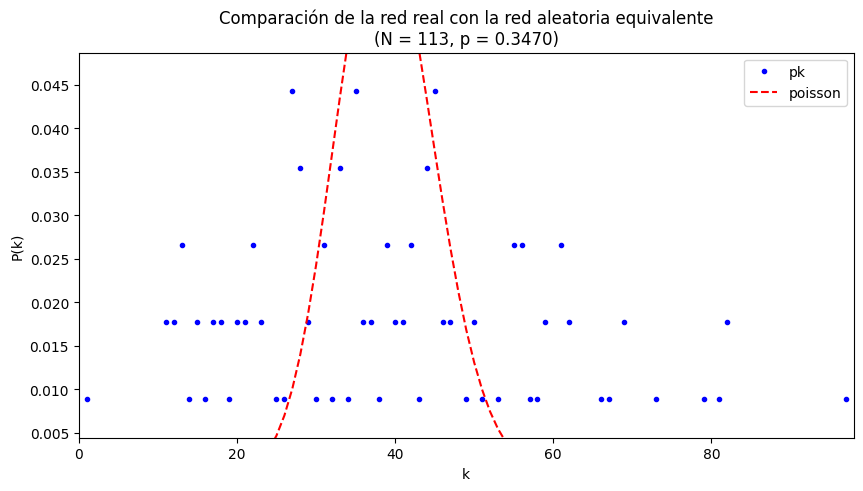

In [67]:
# Comparación de distribución de grado con red aleatoria correspondiente.

plt.figure(figsize = [10,5])
plt.plot(x[:-1], y,"b." ,label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 12)
plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,x.max()])
plt.xlabel('k', size = 10)
plt.ylabel('P(k)', size = 10)
plt.legend()
plt.show()

¿Se ajusta bien o no?

No se ajusta para nada bien puesto que la distribución de grado de la red real es muy dispersa y la de la red aleatoria es muy concentrada.

### Red con independencia de escala
A partir de la distribución de grado, encontrar el exponenete de la ley de potencia que mejor se ajuste (como se hizo en https://moodle.fciencias.unam.mx/cursos/mod/forum/view.php?id=66503 )

C:\Users\pepe2\AppData\Local\Temp\ipykernel_17856\137894998.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)
C:\Users\pepe2\AppData\Local\Temp\ipykernel_17856\137894998.py:5: RuntimeWarning: invalid value encountered in double_scalars
  alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)


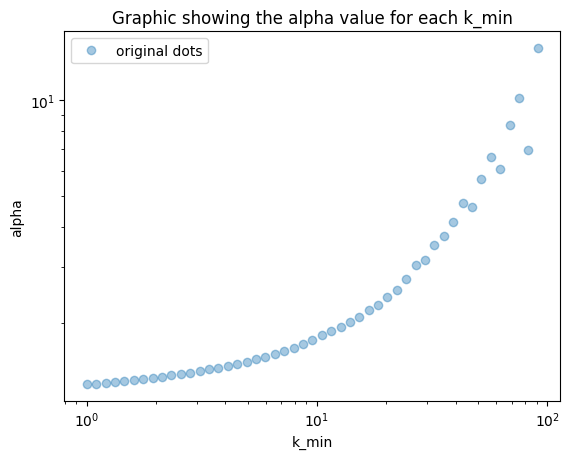

In [70]:
dominio = np.logspace(0,np.log10(K+2))
alphas = []
for k_min in dominio:
    D = Degree[Degree >= k_min]
    alpha = 1 + len(D)*(np.log(D/k_min).sum())**(-1.0)
    alphas.append(alpha)
    
plt.plot(dominio,alphas,'o',alpha = 0.4,label = 'original dots')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k_min')
plt.ylabel('alpha')
plt.title('Graphic showing the alpha value for each k_min')
plt.legend()
plt.show()  

Calculating best minimal value for power law fit
7.134205645915688 55.0


C:\Users\pepe2\AppData\Local\Temp\ipykernel_17856\1663850096.py:7: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,1000000*x**(-fit.alpha),'k--',label = 'exponent = {}'.format(fit.alpha))


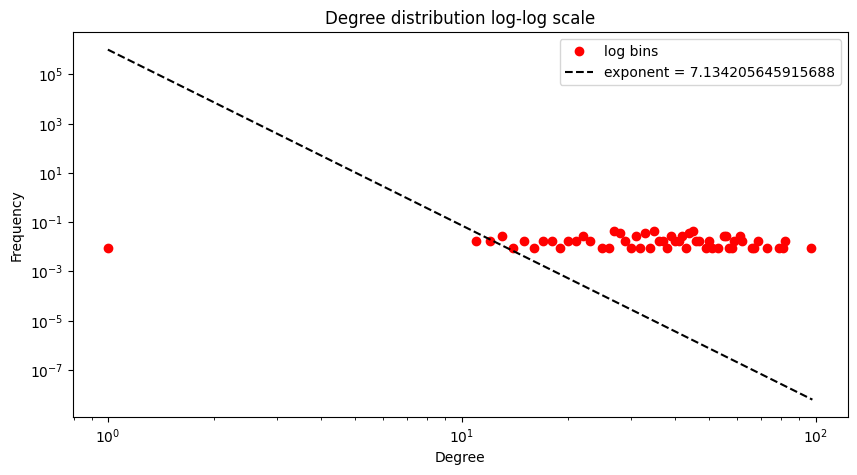

In [69]:
import powerlaw
fit = powerlaw.Fit(Degree)
print(fit.alpha,fit.xmin)

plt.figure(figsize = [10,5])
plt.plot(x[:-1],y,'ro',label = 'log bins')
plt.plot(x,1000000*x**(-fit.alpha),'k--',label = 'exponent = {}'.format(fit.alpha))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree distribution log-log scale')
plt.legend()
plt.show()

### Conclusiones
A partir de las comparaciones de ambos modelos, ¿qué se puede decir del fenómeno que estamos analizando?

## Proceso
En este apartado se aplica algún proceso de los vistos (aclarar cuál) en los datos. Puede ser difusión, percolación, caminata aleatoria, randomización)

In [ ]:
#código

### Interpretación
¿Qué pueden concluir a partir de la simulación? Es una red robusta, está bien conectada, etc.

## Conclusión
¿Qué dirías a partir de todo el análisis realizado sobre el fenómeno que estás estudiando? ¿Qué otros análisis harías? ¿Qué otros datos utilizarías? ¿Qué preguntas de investigación plantearías?